## Flipkart Reviews Sentiment Analysis

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('Dataset-SA.csv')

In [3]:
df.head(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral
5,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,the cooler is really fantastic and provides go...,positive
6,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,highly recommended,very good product,positive
7,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,nice,very nice,positive
8,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,unsatisfactory,very bad cooler,negative
9,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,4,worth the money,very good,positive


In [4]:
df.tail(10)

,product_name,product_price,Rate,Review,Summary,Sentiment
205042,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,nice product,positive
205043,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,material good backing super,positive
205044,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,superb,positive
205045,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,terrific,good quality products,positive
205046,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,classy product,beautiful set very nice,positive
205047,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,must buy!,good product,positive
205048,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,super!,nice,positive
205049,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,3,nice,very nice and fast delivery,positive
205050,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,just wow!,awesome product,positive
205051,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,4,value-for-money,very good but mixing bowl not included is one ...,neutral


In [5]:
df.shape

(205052, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


In [7]:
df.describe()

,product_name,product_price,Rate,Review,Summary,Sentiment
count,205052,205052,205052,180388,205041,205052
unique,958,525,8,1324,92923,3
top,cello Pack of 18 Opalware Cello Dazzle Lush Fi...,1299,5,wonderful,good,positive
freq,6005,9150,118765,9016,17430,166581


In [8]:
null_values = df.isnull().sum()

In [9]:
null_values

product_name         0
product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64

In [10]:
df.dropna(inplace=True)

In [11]:
null_values = df.isnull().sum()
null_values

product_name     0
product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
import string

df['Review'] = df['Review'].apply(lambda x: x.lower())
df['Review'] = df['Review'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

In [14]:
df['Review']

0                   super
1                 awesome
2                    fair
3         useless product
4                    fair
               ...       
205045           terrific
205046     classy product
205049               nice
205050           just wow
205051      valueformoney
Name: Review, Length: 154467, dtype: object

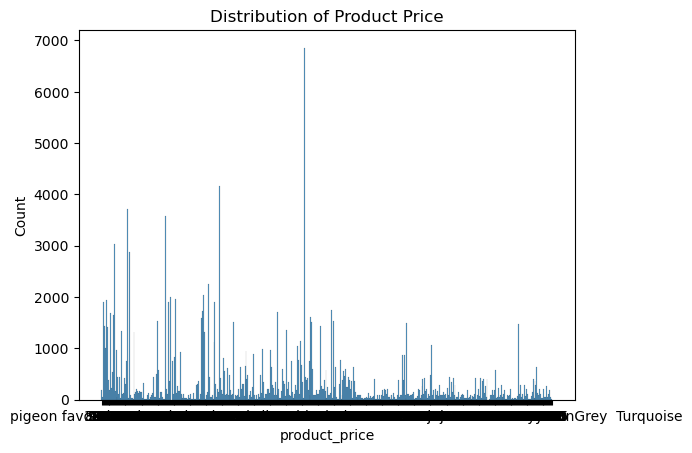

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore the distribution of numerical variables
sns.histplot(df['product_price'])
plt.title('Distribution of Product Price')
plt.show()

In [16]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
positive    122808
negative     23353
neutral       8306
Name: count, dtype: int64


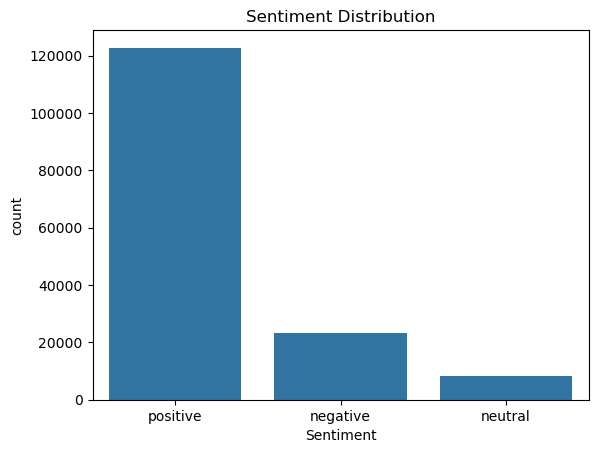

In [17]:
sns.countplot(data=df, x='Sentiment')
plt.title('Sentiment Distribution')
plt.show()

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'df' is your DataFrame containing text data
text_data = df['Review']
vectorizer = CountVectorizer()
feature_matrix = vectorizer.fit_transform(text_data)
feature_names = vectorizer.get_feature_names_out()

In [19]:
feature_names

array(['10', '100', '1010', ..., 'yr', 'zero', 'zip'], dtype=object)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate CountVectorizer object
count_vectorizer = CountVectorizer()

# Fit the CountVectorizer on the text data
count_vectorizer.fit(df['Review'])

# Transform the text data into a feature matrix
data_features = count_vectorizer.transform(df['Review'])


In [21]:
data_features

<154467x1325 sparse matrix of type '<class 'numpy.int64'>'
	with 293410 stored elements in Compressed Sparse Row format>

In [22]:
data_features.shape

(154467, 1325)

In [23]:
data_features.getnnz()

293410

In [24]:
density = (data_features.getnnz() * 100) / (data_features.shape[0] * data_features.shape[1])
print("Density of the matrix: ", density)

Density of the matrix:  0.14335845807451578


In [25]:
feature_counts = df['Review'].value_counts()
feature_counts

Review
wonderful                                         7623
not specified                                     5714
great product                                     4816
brilliant                                         4807
awesome                                           4797
                                                  ... 
no 1 worst product                                   1
50  50                                               1
really bad product worst service from flipkart       1
nice mixer  nice price                               1
product looking very nice  strong quality            1
Name: count, Length: 1263, dtype: int64

In [26]:
features = vectorizer.get_feature_names_out()  # Replace with the variable that holds feature names
features_counts = np.sum(data_features.toarray(), axis=0)
features_counts_df = pd.DataFrame({'features': features, 'counts': features_counts})

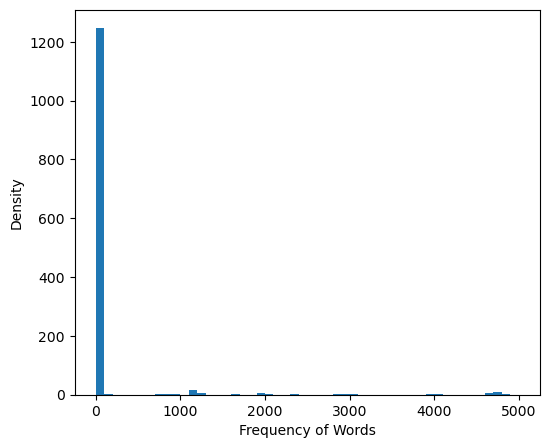

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.hist(features_counts_df['counts'], bins=50, range=(0, 5000))
plt.xlabel('Frequency of Words')
plt.ylabel('Density')
plt.show()



In [28]:
count_of_single_occurrences = len(features_counts_df[features_counts_df['counts'] == 1])
count_of_single_occurrences

763

In [29]:
count_vectorizer = CountVectorizer(max_features=10000)
feature_vector = count_vectorizer.fit_transform(df['Review'])
features = count_vectorizer.get_feature_names_out()
data_features = feature_vector.toarray()
features_counts = np.sum(data_features, axis=0)
feature_counts = pd.DataFrame({'features': features, 'counts': features_counts})

In [30]:
top_features_counts = feature_counts.sort_values('counts', ascending=False).head(15)
top_features_counts

,features,counts
930,product,25782
521,good,14842
1172,the,9591
115,awesome,9558
943,purchase,9310
1166,terrific,9260
819,not,8867
810,nice,7915
1304,worth,7651
1293,wonderful,7638


In [31]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
english_stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [32]:
df['Review'][0:10]

0                 super
1               awesome
2                  fair
3       useless product
4                  fair
5               awesome
6    highly recommended
7                  nice
8        unsatisfactory
9       worth the money
Name: Review, dtype: object

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model
model = SVC()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.9011458535637988
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



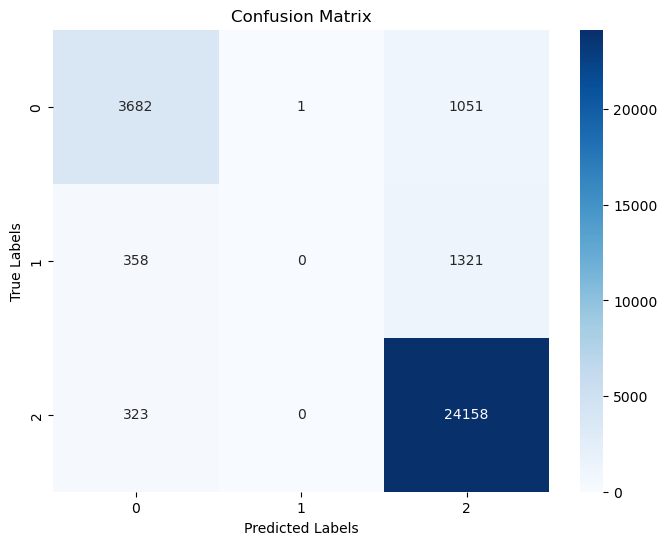

In [34]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [36]:
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Random Forest)
model = RandomForestClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.901242959798019
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894



In [37]:
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Logistic Regression)
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.9012105910532789
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.67      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.81      0.59      0.59     30894
weighted avg       0.89      0.90      0.87     30894



In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a classification model (Gradient Boosting)
model = GradientBoostingClassifier()
model.fit(X_train_vectorized, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report:\n", report)

Accuracy:  0.9011458535637988
Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.78      0.81      4734
     neutral       0.00      0.00      0.00      1679
    positive       0.91      0.99      0.95     24481

    accuracy                           0.90     30894
   macro avg       0.58      0.59      0.59     30894
weighted avg       0.85      0.90      0.87     30894

